In [1]:
import numpy as np
import matplotlib.pyplot as plt
from data_preprocessing.stochastic_systems_models import logarithmic_three_population_pulse, logarithmic_three_population_chase, pulse_summary_statistics, chase_summary_statistics, logarithmic_one_population_pulse, logarithmic_one_population_chase, three_population_birth_rate_burn_in
import data_preprocessing.stochastic_systems_models as ssm
#from data_preprocessing.data_preprocessing import training_mito_lengths, training_dna_numbers, training_edu_numbers, training_mito_lengths_chase
import data_preprocessing.data_preprocessing as data

SMALL_SIZE = 15
MEDIUM_SIZE = 21
BIGGER_SIZE = 21

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rcParams['font.family'] = 'Arial'

In [13]:
stochastic_simulator = ssm.ou_inhibition_three_population_pulse
params = np.load("./data_preprocessing/simulated_ABC_data_birth_rate_selection/stochastic_inhibition/three_population_pulse_stocinh_accepted_params_tb1000_eduSS.npy")
sums = np.load("./data_preprocessing/simulated_ABC_data_birth_rate_selection/stochastic_inhibition/three_population_pulse_stocinh_sums_tb1000_eduSS.npy")
params2 = np.load("./data_preprocessing/simulated_ABC_data_birth_rate_selection/stochastic_inhibition/three_population_pulse_stocinh_accepted_params_tb1000.npy")
all_params = np.load("./data_preprocessing/simulated_ABC_data_birth_rate_selection/stochastic_inhibition/three_population_pulse_stocinh_params_tb1000_eduSS.npy")
print(params2[4])



[1.68683409e+02 1.43008674e+00 7.12377435e-02 1.74846152e-02
 1.55664305e-02 1.83667305e-01 9.02384422e-02 2.26104017e-02
 2.48455814e-01]


(array([0.88137843, 1.1417857 , 1.36213031, 1.46228695, 1.12175437,
        1.16181703, 0.90140976, 0.6410025 , 0.70109648, 0.6410025 ]),
 array([4.46413957e-04, 1.00290019e-01, 2.00133624e-01, 2.99977228e-01,
        3.99820833e-01, 4.99664438e-01, 5.99508043e-01, 6.99351648e-01,
        7.99195253e-01, 8.99038858e-01, 9.98882462e-01]),
 <BarContainer object of 10 artists>)

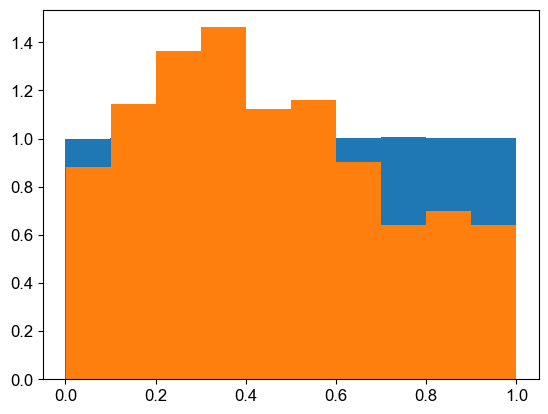

In [14]:
plt.hist(all_params.transpose()[-1], density=True)
plt.hist(params.transpose()[-1], density=True)


(array([0.18090936, 0.18090936, 0.29481525, 0.28141455, 0.32831698,
        0.36851906, 0.33501733, 0.35511837, 0.60303119, 0.42212183]),
 array([-2.99268243, -2.69419041, -2.39569838, -2.09720636, -1.79871434,
        -1.50022231, -1.20173029, -0.90323826, -0.60474624, -0.30625421,
        -0.00776219]),
 <BarContainer object of 10 artists>)

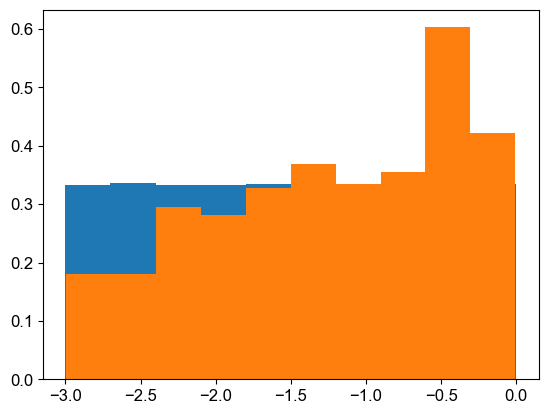

In [16]:
plt.hist(np.log10(all_params.transpose()[-2]), density=True)
plt.hist(np.log10(params.transpose()[-2]), density=True)

In [ ]:
plt.hist(all_params.transpose()[-3], density=True)
plt.hist(params.transpose()[-3], density=True)

In [4]:
len(all_params)

245000

In [6]:
n1,e1,l1,n2,e2,l2,n3,e3,l3,n4,e4,l4,_,_,_,_ = stochastic_simulator(
params = params[1], verbose = True, full_trajectory = False, mode = "full", burn_in = 1000, increments = 1
        )

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

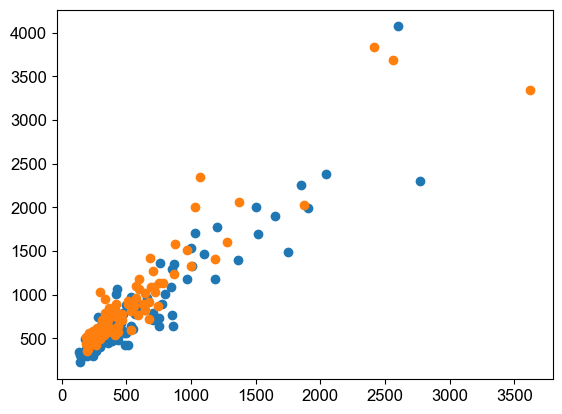

In [4]:
plt.scatter(l4,n4)
plt.scatter(l1, data.all_assays_dna_number_1hr)

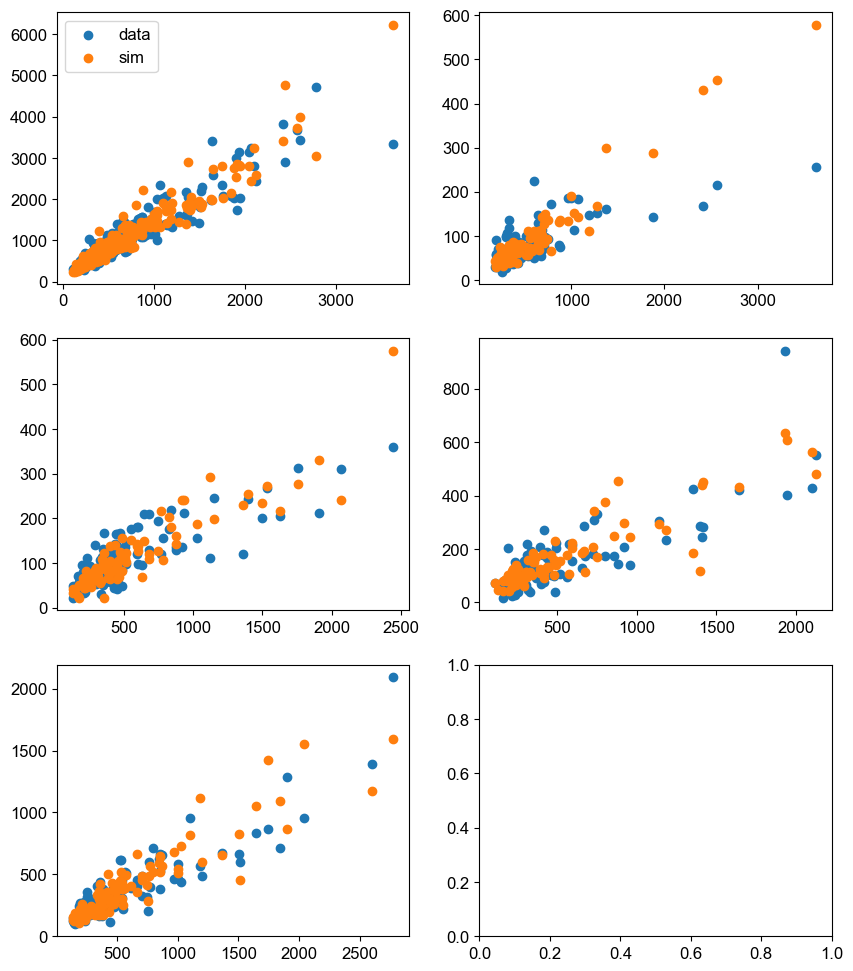

In [8]:
fig, ax = plt.subplots(3,2, figsize = (10,12))
ax[0,0].scatter(data.all_assays_mito_lengths, data.all_assays_dna_numbers,label = "data")
ax[0,0].scatter(data.all_assays_mito_lengths,np.concatenate([n1,n2,n3,n4]), label = "sim")
ax[0,0].legend()
ax[0,1].scatter(l1, data.all_assays_edu_number_1hr,label = "data")
ax[0,1].scatter(l1,e1, label = "sim")
ax[1,0].scatter(l2, data.all_assays_edu_number_3hr,label = "data")
ax[1,0].scatter(l2,e2, label = "sim")
ax[1,1].scatter(l3,data.all_assays_edu_number_7hr,  label = "data")
ax[1,1].scatter(l3, e3,label = "sim")
ax[2,0].scatter(l4,data.all_assays_edu_number_24hr,  label = "data")
ax[2,0].scatter(l4,e4, label = "sim")

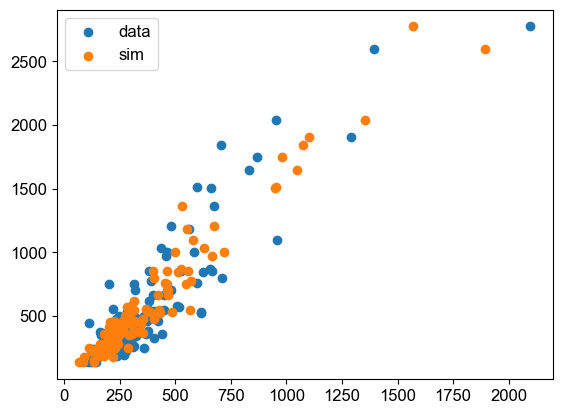

In [83]:
plt.scatter(data.all_assays_edu_number_24hr, l4, label = "data")
plt.scatter(e4,l4, label = "sim")
plt.legend()


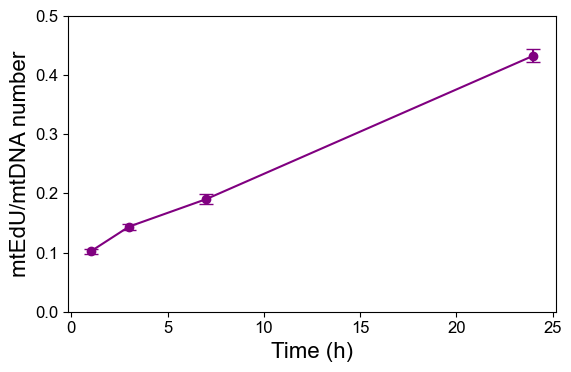

In [2]:
plt.figure(figsize = (6,4))
mean_edu = np.array([np.mean(data.all_assays_edu_number_1hr/data.all_assays_dna_number_1hr), np.mean(data.all_assays_edu_number_3hr/data.all_assays_dna_number_3hr), np.mean(data.all_assays_edu_number_7hr/data.all_assays_dna_number_7hr), np.mean(data.all_assays_edu_number_24hr/data.all_assays_dna_number_24hr)])
err_edu = np.array([np.std(data.all_assays_edu_number_1hr/data.all_assays_dna_number_1hr)/np.sqrt(len(data.all_assays_edu_number_1hr)),
                    np.std(data.all_assays_edu_number_3hr/data.all_assays_dna_number_3hr)/np.sqrt(len(data.all_assays_edu_number_3hr)),
                    np.std(data.all_assays_edu_number_7hr/data.all_assays_dna_number_7hr)/np.sqrt(len(data.all_assays_edu_number_7hr)),
                    np.std(data.all_assays_edu_number_24hr/data.all_assays_dna_number_24hr)/np.sqrt(len(data.all_assays_edu_number_24hr))])
plt.errorbar(np.array([1,3,7,24]), mean_edu, err_edu, fmt = "o-", color = '#800080',capsize=5)
plt.ylim(0,0.5)
plt.ylabel("mtEdU/mtDNA number")
plt.xlabel("Time (h)")
#plt.title("Pulse Experiment")
plt.tight_layout()
plt.savefig("pulse_sup", dpi=300)

In [21]:
9/4

2.25

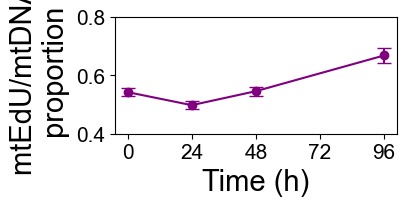

In [22]:

plt.figure(figsize = (4.5, 2.5))
mean_edu = np.array([np.mean(data.all_assays_edu_number_0dy/data.all_assays_dna_number_0dy), np.mean(data.all_assays_edu_number_1dy/data.all_assays_dna_number_1dy), np.mean(data.all_assays_edu_number_2dy/data.all_assays_dna_number_2dy), np.mean(data.all_assays_edu_number_4dy/data.all_assays_dna_number_4dy)])
err_edu = np.array([np.std(data.all_assays_edu_number_0dy/data.all_assays_dna_number_0dy)/np.sqrt(len(data.all_assays_edu_number_0dy)),
                    np.std(data.all_assays_edu_number_1dy/data.all_assays_dna_number_1dy)/np.sqrt(len(data.all_assays_edu_number_1dy)),
                    np.std(data.all_assays_edu_number_2dy/data.all_assays_dna_number_2dy)/np.sqrt(len(data.all_assays_edu_number_2dy)),
                    np.std(data.all_assays_edu_number_4dy/data.all_assays_dna_number_4dy)/np.sqrt(len(data.all_assays_edu_number_4dy))])
plt.errorbar(24*np.array([0,1,2,4]), mean_edu, err_edu, fmt = "o-", color = '#800080',capsize=5)
plt.ylim(0.4,0.8)
plt.xticks([0,24,48,72,96], [0,24,48,72,96])
plt.ylabel("mtEdU/mtDNA \n proportion")
plt.xlabel("Time (h)")
plt.tight_layout()
plt.savefig("subpanels/chase_edu_prop.pdf")

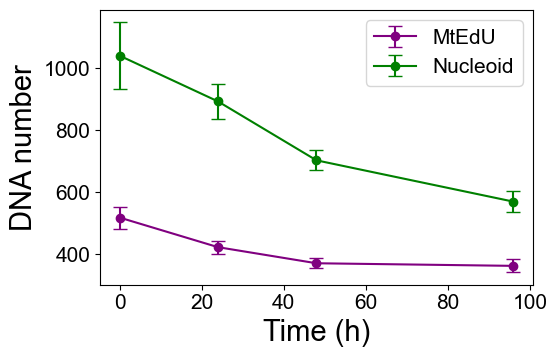

In [18]:
plt.figure(figsize = (6,4))
mean_edu_chase = np.array([np.mean(data.all_assays_edu_number_0dy), np.mean(data.all_assays_edu_number_1dy), np.mean(data.all_assays_edu_number_2dy), np.mean(data.all_assays_edu_number_4dy)])
mean_dna_chase = np.array([np.mean(data.all_assays_dna_number_0dy), np.mean(data.all_assays_dna_number_1dy), np.mean(data.all_assays_dna_number_2dy), np.mean(data.all_assays_dna_number_4dy)])
plt.errorbar(24*np.array([1,2,3,5])-24, mean_edu_chase, data.all_assays_edu_number_chase_err, fmt = "o-", color = '#800080',capsize=5, label = "MtEdU")
plt.errorbar(24*np.array([1,2,3,5])-24, mean_dna_chase, data.all_assays_dna_number_chase_err, fmt = "o-", color = 'green',capsize=5, label = "Nucleoid")
plt.ylabel("DNA number")
plt.xlabel("Time (h)")
plt.legend()
#plt.title("Pulse-Chase Experiment")
plt.tight_layout()
plt.savefig("subpanels/pulsechase.pdf")

In [2]:
three_population_pulse_accepted_params = np.load("data_preprocessing/simulated_ABC_data/three_population_model/three_population_pulse_accepted_params.npy")
three_population_chase_accepted_params = np.load("data_preprocessing/simulated_ABC_data/three_population_model/three_population_chase_accepted_params.npy")
def MAP_approximator(params, k):
    average_distances = []
    for i in range(len(params)):
        distance = np.mean((params[i] - np.delete(params,i,axis=0))**2, axis=1)
        idx = np.argpartition(distance, k)

        smallest_k_distances = distance[idx[:k]]
        average_distances.append(np.mean(smallest_k_distances))
    return average_distances

average_distances_log = MAP_approximator(three_population_pulse_accepted_params, k=50)
map_log = three_population_pulse_accepted_params[np.argmin(average_distances_log)]
average_distances_log = MAP_approximator(three_population_chase_accepted_params, k=50)
map_chase = three_population_chase_accepted_params[np.argmin(average_distances_log)]


In [4]:
map_chase

NameError: name 'map_chase' is not defined

In [ ]:
ou_chase_param = np.array([3.02149142e+02, 1.29252377e+00, 1.25516586e-01, 2.66719162e-01,
       2.90817076e-02, 4.48307503e-02, 2.21426312e-01, 0.00000000e+00,
       2.66719162e-01, 2.90817076e-02, 0.00000000e+00, 4e-2, 0.02,0.07])
ou_param = np.array([2.23527222e+02, 1.25827334e+00, 3.68497392e-01, 1.87180543e-02,6.23974919e-02, 2.02692039e-01, 4e-2, 0.02, 0.07])

In [7]:
0.004/0.06

0.06666666666666667

In [9]:
np.log10(0.02)

-1.6989700043360187

In [ ]:
#c: 10**-4,10**0
#theta: needs to be sufficiently small: 10**-3, 10**-1
#sd: as a percentage of the birth rate = U(0,0.2)

In [3]:
(nucleoid_num_0dy, tagged_num_0dy, mtvolume_0dy, nucleoid_num_1dy, tagged_num_1dy, mtvolume_1dy,
           nucleoid_num_2dy, tagged_num_2dy, mtvolume_2dy, nucleoid_num_4dy, tagged_num_4dy, mtvolume_4dy,
           initial_average_peak1_proportion_chase, final_average_peak1_proportion_chase, 
           variance_statistic, trajectory_chase, S_h) = ssm.ou_logarithmic_three_population_chase(ou_chase_param, verbose = True, full_trajectory = False, mode = "training")

NameError: name 'ou_chase_param' is not defined

In [9]:

(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory, S_h) = ssm.ou_logarithmic_three_population_pulse(ou_param, verbose = True, full_trajectory = False, mode = "training")

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

In [7]:
ou_param = np.array([2.23527222e+02, 1.25827334e+00, 3.68497392e-01, 1.87180543e-02,6.23974919e-02, 2.02692039e-01, 0.1, 0.02, 0.1])
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory, S_h) = ssm.ou_inhibition_three_population_pulse(ou_param, verbose = True, full_trajectory = False, mode = "training")

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

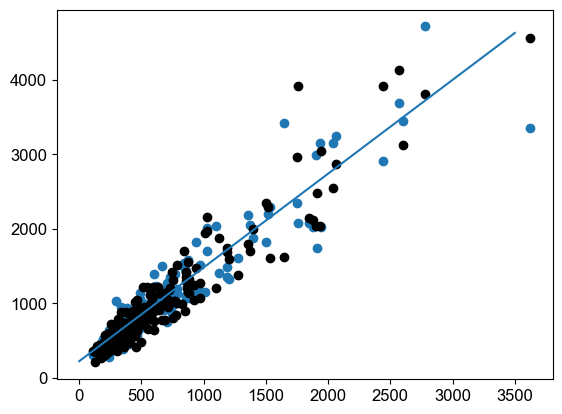

In [8]:
plt.scatter(data.training_mito_lengths, data.training_dna_numbers)
plt.scatter(mtvolume_1hr, nucleoid_num_1hr, color = "black")
plt.scatter(mtvolume_3hr, nucleoid_num_3hr, color = "black")
plt.scatter(mtvolume_7hr, nucleoid_num_7hr, color = "black")
plt.scatter(mtvolume_24hr, nucleoid_num_24hr, color = "black")
x=np.array([0,3500])
plt.plot(x, 2.23527222e+02 + x*1.25827334e+00)


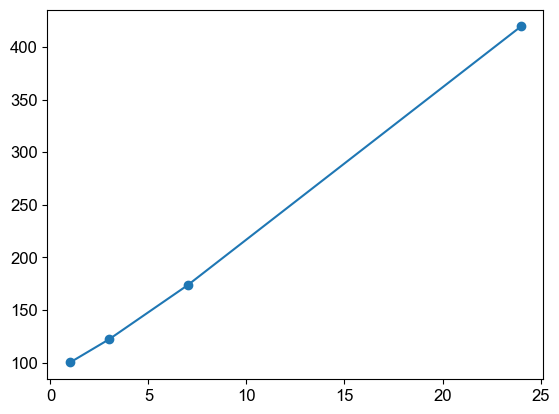

In [7]:
plt.plot(np.array([1,3,7,24]), np.array([np.mean(tagged_num_1hr), np.mean(tagged_num_3hr), np.mean(tagged_num_7hr), np.mean(tagged_num_24hr)]), "o-")

In [ ]:
map_log

array([2.23527222e+02, 1.25827334e+00, 3.68497392e-01, 1.87180543e-02,
       6.23974919e-02, 2.02692039e-01, 3.54651688e-02])

In [11]:
beta0, beta1, p, mu_d, mu_b, mu_r, c = map_log
f = 1/(mu_b/p)/(1/mu_r + 1/(mu_b/p) + 1/mu_d)
b0_adj, b1_adj = beta0*f, beta1*f

In [13]:
c

0.035465168814734715

In [7]:
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory, S_h)= ssm.logarithmic_three_population_pulse(map_log, verbose = True, full_trajectory = False, mode = "full")

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

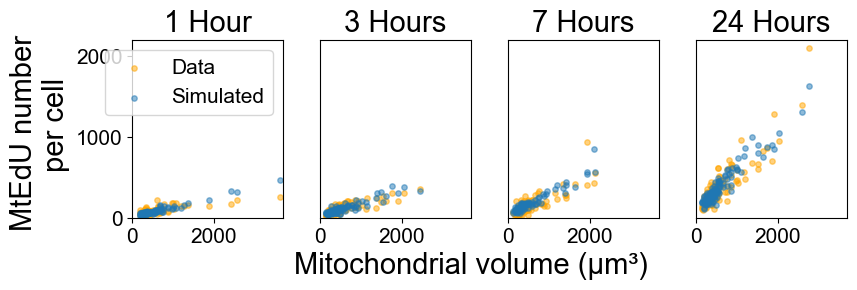

In [11]:
fig, ax = plt.subplots(1,4, figsize = (9,3))
ax[0].scatter(data.all_assays_mito_length_1hr, data.all_assays_edu_number_1hr, alpha = 0.5, color = "orange",s=15, label = "Data")
ax[1].scatter(data.all_assays_mito_length_3hr, data.all_assays_edu_number_3hr, alpha = 0.5, color = "orange",s=15)
ax[2].scatter(data.all_assays_mito_length_7hr, data.all_assays_edu_number_7hr, alpha = 0.5, color = "orange",s=15)
ax[3].scatter(data.all_assays_mito_length_24hr, data.all_assays_edu_number_24hr, alpha = 0.5, color = "orange",s=15)

ax[0].scatter(mtvolume_1hr, tagged_num_1hr, alpha = 0.5, color = "tab:blue", s=15, label = "Simulated")
ax[1].scatter(mtvolume_3hr, tagged_num_3hr, alpha = 0.5, color = "tab:blue", s=15)
ax[2].scatter(mtvolume_7hr, tagged_num_7hr, alpha = 0.5, color = "tab:blue", s=15)
ax[3].scatter(mtvolume_24hr, tagged_num_24hr, alpha = 0.5, color = "tab:blue", s=15)

ax[0].set_ylim(0,2200)
ax[1].set_ylim(0,2200)
ax[2].set_ylim(0,2200)
ax[3].set_ylim(0,2200)

ax[0].set_xlim(0,3700)
ax[1].set_xlim(0,3700)
ax[2].set_xlim(0,3700)
ax[3].set_xlim(0,3700)

ax[0].legend()

ax[1].set_yticks([],[])
ax[2].set_yticks([],[])
ax[3].set_yticks([],[])
ax[0].set_ylabel("MtEdU number \n per cell")

ax[0].set_title("1 Hour")
ax[1].set_title("3 Hours")
ax[2].set_title("7 Hours")
ax[3].set_title("24 Hours")
fig.text(0.35, 0.04, 'Mitochondrial volume (μm³)', va='center')
#fig.supylabel('EdU Number')
plt.tight_layout()
plt.savefig("subpanels/edu_mito.pdf")


In [23]:
np.random.seed(4)
random_walks = []
for i in range(5):
    x=2*np.random.binomial(1, 1/2, 100000)-1
    random_walks.append(np.cumsum(x))

Text(0.5, 1.0, '$N_{opt} = 400$')

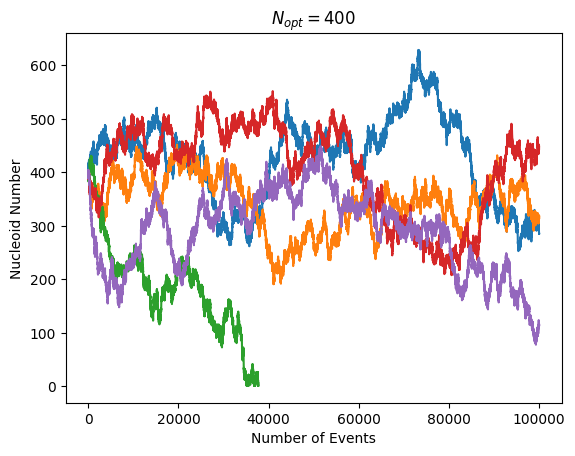

In [28]:
for walk in random_walks:
    plt.plot(400 + walk[walk >-400])

plt.ylabel("Nucleoid Number")
plt.xlabel("Number of Events")
plt.title("$N_{opt} = 400$")

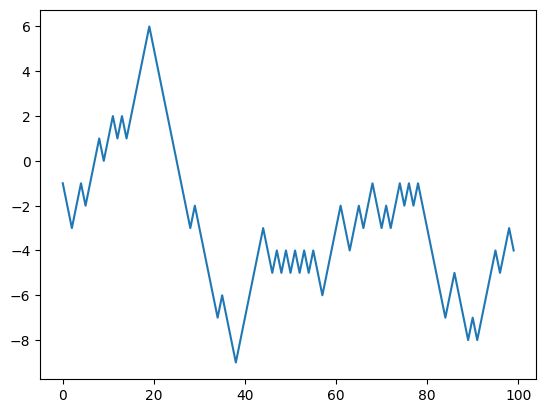

In [4]:
plt.plot(y)

In [88]:
beta0, beta1, sig, diffusion_prob_pulse, mu_d_pulse, mu_b_pulse, true_birth_param, mu_b_chase, diffusion_prob_chase, mu_d_chase, mu_a_chase, c = map_chase
def young_rep_dwell_time(num_sims, mu_r, mu_b, p):
    mu_a = mu_b/p

    denom = 1/mu_r + 1/(mu_a)
    replicating_prop = 1/(mu_r*denom)
    #replicating_prop = 1
    rty = mu_r*(1+p)/2

    times = []
    for i in range(num_sims):
        t=0
        finish = 0
        state = np.random.binomial(1,replicating_prop)
        while not finish:
            #in the replicating population
            if state == 1:
                t += np.random.exponential(1/rty)
                state = 0
            #in the young population
            else:
                t += np.random.exponential(1/(mu_a+mu_b))
                state = 1
                finish = np.random.binomial(1, mu_a/(mu_a+mu_b))
        times.append(t)
    
    return np.array(times)

In [122]:
beta0, beta1, sig, diffusion_prob_pulse, mu_d_pulse, mu_b_pulse, true_birth_param, mu_b_chase, diffusion_prob_chase, mu_d_chase, mu_a_chase, c = three_population_chase_accepted_params.transpose()

In [115]:
mu_a = mu_b_pulse/diffusion_prob_pulse
#print(mu_a/(mu_a+mu_b_pulse))
print(np.mean(1/mu_d_pulse))
print(np.std(1/mu_d_pulse))

39.999275507324036
4.606020220613425


In [108]:
analytical_old_young(three_population_chase_accepted_params.transpose())

(array([ 8.79982694, 14.20074182, 17.4494647 , 12.06522228, 15.1022339 ,
        14.31315249, 15.16318274, 22.04664113, 12.30918755, 14.13321062,
        13.21941557, 10.98315241, 10.02584648, 13.05448458, 12.60273143,
        11.04493344, 10.11941047,  9.77232749,  9.35853023, 12.24676284,
        11.38071164, 18.89307824, 13.14501932,  8.96384099, 11.56238844,
        21.28461085, 14.44519264,  7.8650107 , 14.80402988, 12.49541107,
         9.19541345, 12.54271709, 13.64223799, 12.76014113, 24.66742693,
        14.08228227, 11.09906503, 11.95266426, 10.97344991,  8.40915349,
        11.27003837,  8.93356906, 19.10656396, 13.9346036 , 10.03248135,
        18.15042477, 12.98120262, 10.61871139, 14.16650875, 11.36969439,
        13.91828124, 19.50769728, 11.90477769, 12.84203623, 15.74387339,
         9.55277555, 14.4060855 , 10.2603    , 13.50508242, 12.01005075,
        12.56767954, 17.59152534, 15.51471296, 11.76164557, 11.50049702,
        16.47276067, 14.25480992, 18.1205368 , 10.2

(array([0.02179849, 0.10535938, 0.25068267, 0.44686911, 0.35240897,
        0.30881199, 0.13442404, 0.08719397, 0.08356089, 0.02543158]),
 array([2.287436  , 2.83793277, 3.38842954, 3.9389263 , 4.48942307,
        5.03991984, 5.5904166 , 6.14091337, 6.69141014, 7.24190691,
        7.79240367]),
 <BarContainer object of 10 artists>)

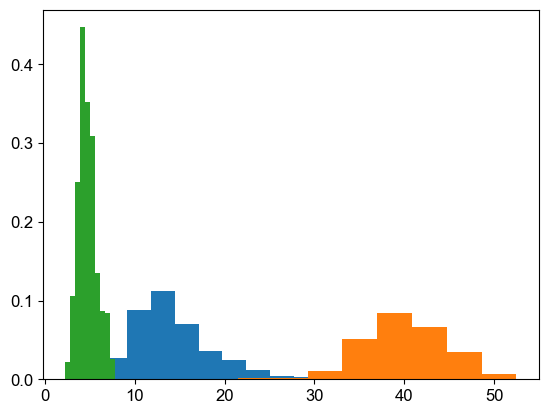

In [118]:
plt.hist(analytical_old_young(three_population_chase_accepted_params.transpose()), density = True)
plt.hist(1/mu_d_pulse, density = True)
plt.hist(1/true_birth_param, density = True)

In [125]:
print("replicative mean times = " +str(np.mean(analytical_old_young(three_population_chase_accepted_params.transpose()))))
print("replicative std times = " +str(np.std(analytical_old_young(three_population_chase_accepted_params.transpose()))))
print("replicating mean times = " +str(np.mean(1/true_birth_param)))
print("replicating mean times = " +str(np.std(1/true_birth_param)))
print("old mean times = " +str(np.mean(1/mu_d_pulse)))
print("old mean times = " +str(np.std(1/mu_d_pulse)))
      

replicative mean times = 14.38476324995291
replicative std times = 4.371306123829548
replicating mean times = 4.757039732823128
replicating mean times = 1.0212366625320997
old mean times = 39.999275507324036
old mean times = 4.606020220613425


In [67]:
mu_a = mu_b_pulse/diffusion_prob_pulse


#initialising each subpopulation via the equilibrium proportions (under a deterministic treatment)
initialisation_denom = 1/true_birth_param + 1/mu_a + 1/mu_d_pulse    
replicating_prop = 1/(true_birth_param*initialisation_denom)
young_prop = 1/(mu_a*initialisation_denom)
old_prop = 1/(mu_d_pulse*initialisation_denom)


In [102]:
times = young_rep_dwell_time(100000, true_birth_param, mu_b_pulse, diffusion_prob_pulse)

In [103]:
print("rep+young before ageing:" +str(np.mean(times)))
print("old before dying:" +str(1/mu_d_pulse))
print("replication:" +str(1/true_birth_param))
print("both-to-young:" +str(1/(diffusion_prob_pulse*true_birth_param)))

rep+young before ageing:10.908976188743566
old before dying:34.385876334218935
replication:4.516175123961041
both-to-young:16.93232348337958


In [109]:
def analytical_old_young(params):
    _, _, _, p, mu_d, mu_b, mu_r, _, _, _, _, _ = params 
    mu_a = mu_b/p
    t_r = 2/((1+p)*(mu_r*mu_a))*(mu_b+mu_a + mu_r*(1+p)/2)
    t_y = 2/((1+p)*(mu_r*mu_a))*(mu_b+mu_r*(1+p)/2)
    denom = 1/mu_r + 1/mu_a
    t = 1/(mu_r*denom)*t_r + 1/(mu_a*denom)*t_y
    return t

In [85]:
analytical_old_young(map_chase)

(10.928295991508792, 14.98181929859112, 7.851311983703441)

In [105]:
analytical_old_young(three_population_chase_accepted_params.transpose())

(array([ 8.79982694, 14.20074182, 17.4494647 , 12.06522228, 15.1022339 ,
        14.31315249, 15.16318274, 22.04664113, 12.30918755, 14.13321062,
        13.21941557, 10.98315241, 10.02584648, 13.05448458, 12.60273143,
        11.04493344, 10.11941047,  9.77232749,  9.35853023, 12.24676284,
        11.38071164, 18.89307824, 13.14501932,  8.96384099, 11.56238844,
        21.28461085, 14.44519264,  7.8650107 , 14.80402988, 12.49541107,
         9.19541345, 12.54271709, 13.64223799, 12.76014113, 24.66742693,
        14.08228227, 11.09906503, 11.95266426, 10.97344991,  8.40915349,
        11.27003837,  8.93356906, 19.10656396, 13.9346036 , 10.03248135,
        18.15042477, 12.98120262, 10.61871139, 14.16650875, 11.36969439,
        13.91828124, 19.50769728, 11.90477769, 12.84203623, 15.74387339,
         9.55277555, 14.4060855 , 10.2603    , 13.50508242, 12.01005075,
        12.56767954, 17.59152534, 15.51471296, 11.76164557, 11.50049702,
        16.47276067, 14.25480992, 18.1205368 , 10.2

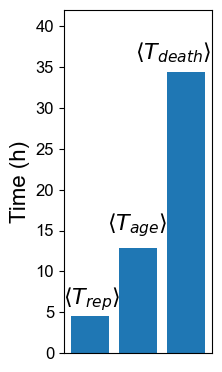

In [68]:
plt.figure(1, figsize = (2.5,4))
plt.bar(np.array([1,2,3]), np.array([4.5, 12.8, 34.4]))
plt.xticks([], [])
plt.text(0.45, 6, r"$\langle T_{rep} \rangle$")
plt.text(1.35, 15, r"$\langle T_{age} \rangle$")
plt.text(1.95, 36, r"$\langle T_{death} \rangle$")
plt.ylim(0,42)
plt.ylabel("Time (h)")
plt.tight_layout()
plt.savefig("dwell_time_bar", dpi=300)

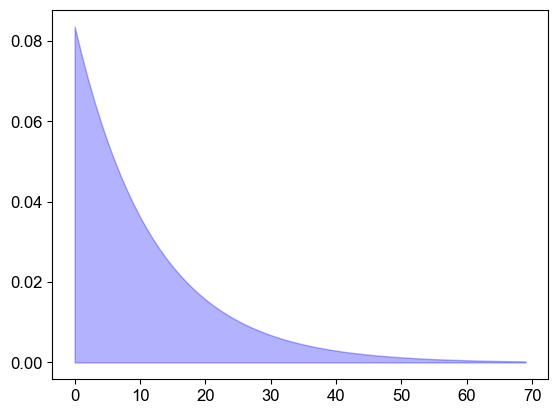

In [ ]:
x = np.arange(70)
#plt.hist(times, density = True, bins = 50)
#plt.plot(x, np.exp(-x/np.mean(times))/np.mean(times))
plt.fill_between(x,np.exp(-x/np.mean(times))/np.mean(times), color="b", alpha = 0.3)
plt.ylabel()

In [2]:
import pandas as pd
distances_excel_file = pd.ExcelFile("../nucleus_distance.xlsx")

dna_dist_1hr = pd.read_excel(distances_excel_file, usecols = 'J', skiprows = lambda x: ((x < 5) or (x >= 34)) and ((x < 44) or (x >= 77)) and ((x < 87) or (x >= 109)) , sheet_name = 1)
edu_dist_1hr = pd.read_excel(distances_excel_file, usecols = 'H', skiprows = lambda x: ((x < 5) or (x >= 34)) and ((x < 44) or (x >= 77)) and ((x < 87) or (x >= 109)) , sheet_name = 1)
dna_num_1hr = pd.read_excel(distances_excel_file, usecols = 'F', skiprows = lambda x: ((x < 5) or (x >= 34)) and ((x < 44) or (x >= 77)) and ((x < 87) or (x >= 109)) , sheet_name = 1)
dna_dist_1hr = np.array(dna_dist_1hr["Unnamed: 9"])
edu_dist_1hr = np.array(edu_dist_1hr["Unnamed: 7"])
dna_num_1hr = np.array(dna_num_1hr["Unnamed: 5"])
percent_dist_1hr = 100*edu_dist_1hr/dna_dist_1hr 

dna_dist_3hr = pd.read_excel(distances_excel_file, usecols = 'W', skiprows = lambda x: ((x < 5) or (x >= 39)) and ((x < 49) or (x >= 83)) and ((x < 95) or (x >= 127)) , sheet_name = 1)
edu_dist_3hr = pd.read_excel(distances_excel_file, usecols = 'U', skiprows = lambda x: ((x < 5) or (x >= 39)) and ((x < 49) or (x >= 83)) and ((x < 95) or (x >= 127)) , sheet_name = 1)
dna_dist_3hr = np.array(dna_dist_3hr["Unnamed: 22"])
edu_dist_3hr = np.array(edu_dist_3hr["Unnamed: 20"])
percent_dist_3hr = 100*edu_dist_3hr/dna_dist_3hr 

dna_dist_7hr = pd.read_excel(distances_excel_file, usecols = 'AJ', skiprows = lambda x: ((x < 5) or (x >= 39)) and ((x < 49) or (x >= 72)) and ((x < 82) or (x >= 113)) , sheet_name = 1)
edu_dist_7hr = pd.read_excel(distances_excel_file, usecols = 'AH', skiprows = lambda x: ((x < 5) or (x >= 39)) and ((x < 49) or (x >= 72)) and ((x < 82) or (x >= 113)) , sheet_name = 1)
dna_dist_7hr = np.array(dna_dist_7hr["Unnamed: 35"])
edu_dist_7hr = np.array(edu_dist_7hr["Unnamed: 33"])
percent_dist_7hr = 100*edu_dist_7hr/dna_dist_7hr 

dna_dist_24hr = pd.read_excel(distances_excel_file, usecols = 'AW', skiprows = lambda x: ((x < 5) or (x >= 48)) and ((x < 58) or (x >= 84)) and ((x < 93) or (x >= 137)) , sheet_name = 1)
edu_dist_24hr = pd.read_excel(distances_excel_file, usecols = 'AU', skiprows = lambda x: ((x < 5) or (x >= 48)) and ((x < 58) or (x >= 84)) and ((x < 93) or (x >= 137)) , sheet_name = 1)
dna_dist_24hr = np.array(dna_dist_24hr["Unnamed: 48"])
edu_dist_24hr = np.array(edu_dist_24hr["Unnamed: 46"])
percent_dist_24hr = 100*edu_dist_24hr/dna_dist_24hr 

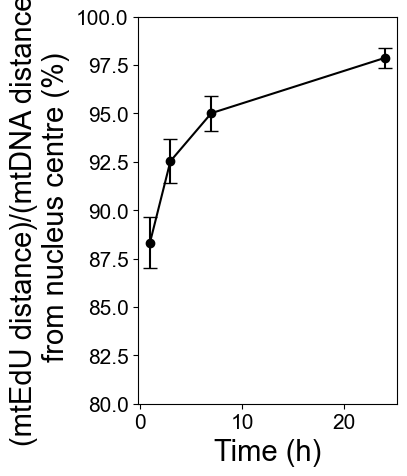

In [3]:
#plt.plot(np.array([1,3,7,24]), np.array([np.mean(percent_dist_1hr), np.mean(percent_dist_3hr),np.mean(percent_dist_7hr),np.mean(percent_dist_24hr)]), color = "black")
plt.figure(figsize = (4.5,5.2))
plt.errorbar(np.array([1,3,7,24]), np.array([np.mean(percent_dist_1hr), np.mean(percent_dist_3hr),np.mean(percent_dist_7hr),np.mean(percent_dist_24hr)]), np.array([np.std(percent_dist_1hr)/np.sqrt(len(percent_dist_1hr)), np.std(percent_dist_3hr)/np.sqrt(len(percent_dist_3hr)),np.std(percent_dist_7hr)/np.sqrt(len(percent_dist_7hr)),np.std(percent_dist_24hr)/np.sqrt(len(percent_dist_24hr))]), color = "black", fmt = "o-",capsize=5)
plt.ylim(80, 100)
plt.xlabel("Time (h)")
plt.ylabel("(mtEdU distance)/(mtDNA distance) \n from nucleus centre (%)") 
plt.tight_layout()
plt.savefig("subpanels/fig4r.svg")


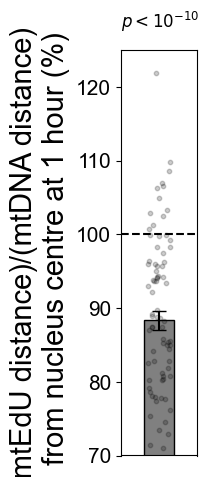

In [8]:
plt.figure(figsize = (2.5,5.2))
plt.bar(1,np.mean(percent_dist_1hr), color = "grey", edgecolor = "black")
plt.scatter(np.random.uniform(0.7, 1.3, len(percent_dist_1hr)), percent_dist_1hr, alpha = 0.2, color = "black", s=10)
plt.errorbar(1, np.mean(percent_dist_1hr), yerr=np.std(percent_dist_1hr)/np.sqrt(len(percent_dist_1hr)), fmt="none", color="black",
       capsize=5)
plt.axhline(100, color = "black", ls = "--")
plt.xlim(0,2)
plt.xticks([],[])
plt.ylim(70,125)

plt.text(0,128, r"$p < 10^{-10}$", fontsize = 12)
plt.ylabel("(mtEdU distance)/(mtDNA distance) \n from nucleus centre at 1 hour (%)") 
plt.tight_layout()
plt.savefig("subpanels/fig4q.pdf")

In [9]:
np.mean(percent_dist_1hr)

88.3167099165169

In [10]:
np.std(percent_dist_1hr)/np.sqrt(len(percent_dist_1hr))

1.3128794677424307

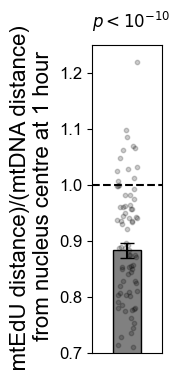

In [8]:
plt.figure(figsize = (2,4))
plt.bar(1,np.mean(edu_dist_1hr/dna_dist_1hr), color = "grey", edgecolor = "black")
plt.scatter(np.random.uniform(0.7, 1.3, len(dna_dist_1hr)), edu_dist_1hr/dna_dist_1hr, alpha = 0.2, color = "black", s=10)
plt.errorbar(1, np.mean(edu_dist_1hr/dna_dist_1hr), yerr=np.std(edu_dist_1hr/dna_dist_1hr)/np.sqrt(len(dna_dist_1hr)), fmt="none", color="black",
       capsize=5)
plt.axhline(1, color = "black", ls = "--")
plt.xlim(0,2)
plt.xticks([],[])
plt.ylim(0.7,1.25)

plt.text(0,1.28, r"$p < 10^{-10}$", fontsize = 12)
plt.ylabel("(mtEdU distance)/(mtDNA distance) \n from nucleus centre at 1 hour") 
plt.tight_layout()
plt.savefig("distance_1hr_test", dpi=300)

In [ ]:
test_stat = (np.mean(percent_dist_1hr) - 100)/(np.std(percent_dist_1hr, ddof=1)/np.sqrt(len(percent_dist_1hr)))
import scipy.stats as so
so.t.cdf(test_stat, len(dna_dist_1hr)-1)

In [201]:
import scipy.stats as so
so.t.cdf(test_stat, len(dna_dist_1hr)-1)

7.313062228506337e-14

{'bodies': [<matplotlib.collections.PolyCollection at 0x26704b40e50>],
 'cmaxes': <matplotlib.collections.LineCollection at 0x26704b40d30>,
 'cmins': <matplotlib.collections.LineCollection at 0x26704b50490>,
 'cbars': <matplotlib.collections.LineCollection at 0x26704b50850>}

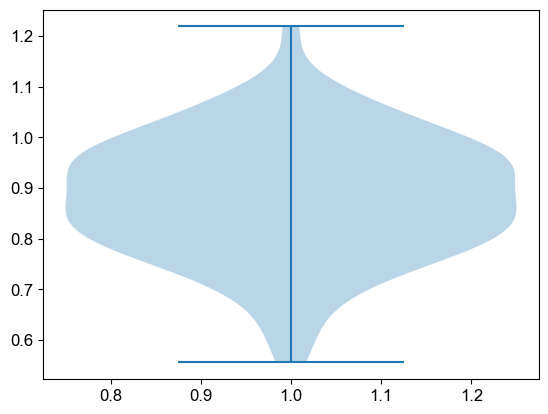

In [152]:
plt.violinplot(edu_dist_1hr/dna_dist_1hr)

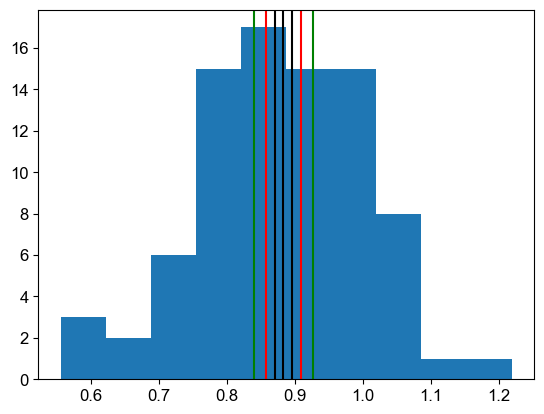

In [144]:
plt.hist(edu_dist_1hr/dna_dist_1hr)
plt.axvline(np.mean(edu_dist_1hr/dna_dist_1hr), color = "black")
plt.axvline(np.mean(edu_dist_1hr/dna_dist_1hr) - np.std(edu_dist_1hr/dna_dist_1hr)/np.sqrt(len(dna_dist_1hr)), color = "black")
plt.axvline(np.mean(edu_dist_1hr/dna_dist_1hr) + np.std(edu_dist_1hr/dna_dist_1hr)/np.sqrt(len(dna_dist_1hr)), color = "black")
plt.axvline(np.mean(edu_dist_1hr/dna_dist_1hr) - 1.96*np.std(edu_dist_1hr/dna_dist_1hr)/np.sqrt(len(dna_dist_1hr)), color = "red")
plt.axvline(np.mean(edu_dist_1hr/dna_dist_1hr) + 1.96*np.std(edu_dist_1hr/dna_dist_1hr)/np.sqrt(len(dna_dist_1hr)), color = "red")
plt.axvline(np.mean(edu_dist_1hr/dna_dist_1hr) - 3.29*np.std(edu_dist_1hr/dna_dist_1hr)/np.sqrt(len(dna_dist_1hr)), color = "green")
plt.axvline(np.mean(edu_dist_1hr/dna_dist_1hr) + 3.29*np.std(edu_dist_1hr/dna_dist_1hr)/np.sqrt(len(dna_dist_1hr)), color = "green")

(array([ 3.,  2.,  6., 15., 17., 15., 15.,  8.,  1.,  1.]),
 array([0.5556265 , 0.62194161, 0.68825672, 0.75457183, 0.82088694,
        0.88720206, 0.95351717, 1.01983228, 1.08614739, 1.1524625 ,
        1.21877761]),
 <BarContainer object of 10 artists>)

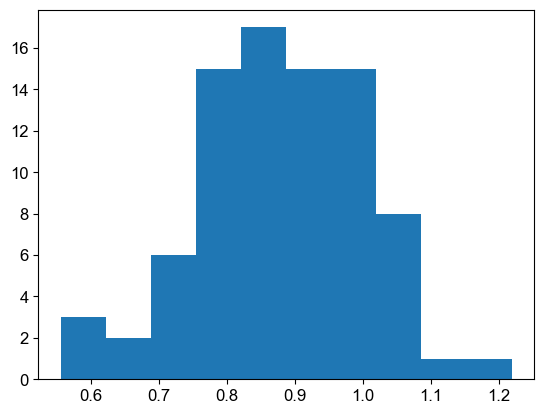

In [104]:
plt.hist(edu_dist_1hr/dna_dist_1hr)

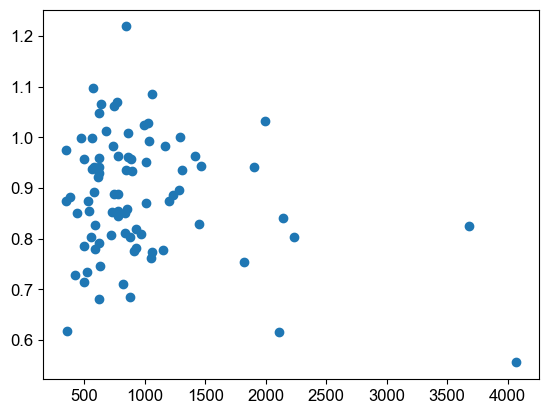

In [103]:
plt.scatter(dna_num_1hr, edu_dist_1hr/dna_dist_1hr)

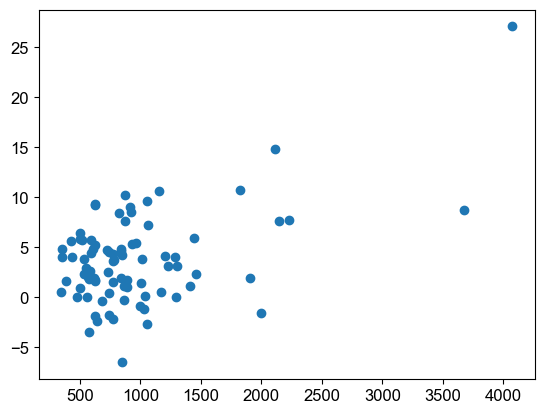

In [109]:
plt.scatter(dna_num_1hr, dna_dist_1hr - edu_dist_1hr )

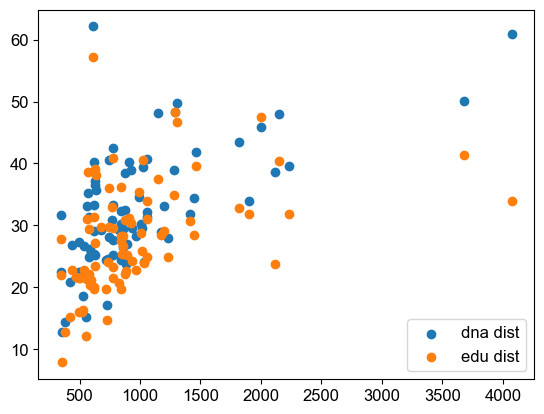

In [108]:
plt.scatter(dna_num_1hr, dna_dist_1hr, label = "dna dist")
plt.scatter(dna_num_1hr, edu_dist_1hr, label = "edu dist")
plt.legend()

In [ ]:
np.array(dna_num_1hr["Unnamed: 5"])
np.array(edu_dist_1hr["Unnamed: 7"])
np.array(dna_dist_1hr["Unnamed: 9"])

array([22.54418619, 30.18801705, 50.13208783, 20.87293132, 21.83052889,
       25.2103566 , 31.89671278, 12.72907105, 39.56731366, 15.14062088,
       25.32584214, 22.51353202, 14.40152748, 35.2087195 , 17.1941045 ,
       33.2904515 , 29.32666632, 62.11536461, 42.42204655, 29.70905564,
       30.22039139, 38.92904117, 33.13724995, 23.74631384, 41.89748527,
       40.27532839, 26.47167526, 33.29306358, 47.95579389, 24.39578403,
       34.38116131, 28.05325215, 24.5519992 , 26.96312122, 31.31068268,
       33.86279029, 27.60584823, 48.16346131, 32.45008828, 29.62818326,
       48.37373836, 39.4601096 , 34.56036782, 26.72525986, 38.52114163,
       25.17527164, 45.95865978, 37.22775024, 26.20580138, 29.08910934,
       49.80195971, 36.50158407, 43.49404397, 40.64744537, 38.68335946,
       24.12874701, 27.99725008, 29.41152274, 38.87379933, 22.46183609,
       35.74105821, 29.23224207, 31.74129871, 27.33431368, 29.65338457,
       21.37343685, 28.28188598, 29.65906447, 40.59621908, 33.17

In [13]:
vec_0dy = np.array([data.training_dna_number_0dy,
                data.training_edu_number_0dy])
vec_1dy = np.array([data.training_dna_number_1dy,
                data.training_edu_number_1dy])
vec_2dy = np.array([data.training_dna_number_2dy,
                data.training_edu_number_2dy])
vec_4dy = np.array([data.training_dna_number_4dy,
                data.training_edu_number_4dy])

In [2]:
data_nucleoid_mean = np.array([np.mean(data.training_dna_number_1hr),np.mean(data.training_dna_number_3hr),np.mean(data.training_dna_number_7hr),np.mean(data.training_dna_number_24hr)])
data_edu_mean = np.array([np.mean(data.training_edu_number_1hr),np.mean(data.training_edu_number_3hr),np.mean(data.training_edu_number_7hr),np.mean(data.training_edu_number_24hr)])
data_nucleoid_mean_chase = np.array([np.mean(data.training_dna_number_0dy),np.mean(data.training_dna_number_1dy),np.mean(data.training_dna_number_2dy),np.mean(data.training_dna_number_4dy)])
data_edu_mean_chase = np.array([np.mean(data.training_edu_number_0dy),np.mean(data.training_edu_number_1dy),np.mean(data.training_edu_number_2dy),np.mean(data.training_edu_number_4dy)])

In [3]:
data_nucleoid_mean = np.array([np.mean(data.validation_dna_number_1hr),np.mean(data.validation_dna_number_3hr),np.mean(data.validation_dna_number_7hr),np.mean(data.validation_dna_number_24hr)])
data_edu_mean = np.array([np.mean(data.validation_edu_number_1hr),np.mean(data.validation_edu_number_3hr),np.mean(data.validation_edu_number_7hr),np.mean(data.validation_edu_number_24hr)])
data_nucleoid_mean_chase = np.array([np.mean(data.validation_dna_number_0dy),np.mean(data.validation_dna_number_1dy),np.mean(data.validation_dna_number_2dy),np.mean(data.validation_dna_number_4dy)])
data_edu_mean_chase = np.array([np.mean(data.validation_edu_number_0dy),np.mean(data.validation_edu_number_1dy),np.mean(data.validation_edu_number_2dy),np.mean(data.validation_edu_number_4dy)])

In [11]:
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory) = ssm.logarithmic_one_population_pulse(np.array([2.53721677e+02, 1.31646488e+00, 0.012, 0.001]), verbose = True, full_trajectory=True, mode = "training")

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

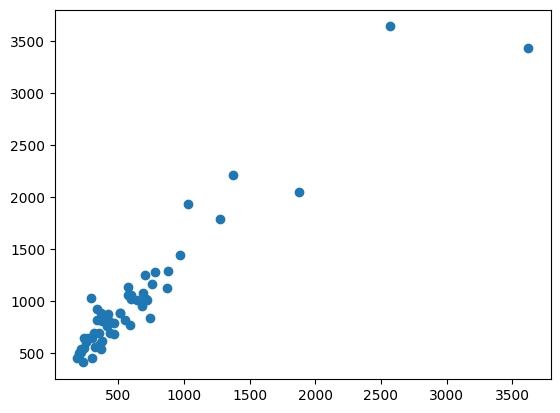

In [9]:
plt.scatter(mtvolume_1hr, nucleoid_num_1hr)

In [11]:
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory) = ssm.logarithmic_two_population_pulse(np.array([2.53721677e+02, 1.31646488e+00, 0.11923586, 0.01683522, 0.20421365, 0.00054214]), verbose = True, full_trajectory=True, mode = "training")

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

In [ ]:
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory) = logarithmic_three_population_pulse(np.array([2.53721677e+02, 1.31646488e+00, 2.86311722e-01,
       2.43572638e-02, 5.33479937e-02, 2.19291558e-01, 2.20471957e-02]), verbose = True, full_trajectory=False, mode = "training")

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

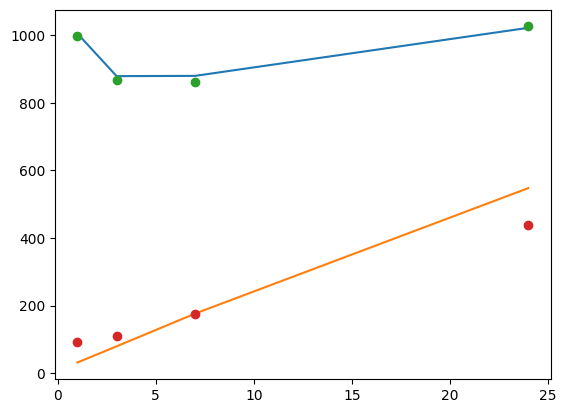

In [10]:
times = np.array([1,3,7,24])
simulated_nucleoid_mean = np.array([np.mean(nucleoid_num_1hr),np.mean(nucleoid_num_3hr),np.mean(nucleoid_num_7hr),np.mean(nucleoid_num_24hr)])
simulated_edu_mean = np.array([np.mean(tagged_num_1hr),np.mean(tagged_num_3hr),np.mean(tagged_num_7hr),np.mean(tagged_num_24hr)])

plt.plot(times, simulated_nucleoid_mean)
plt.plot(times, simulated_edu_mean)
plt.plot(times, data_nucleoid_mean, "o")
plt.plot(times, data_edu_mean, "o")


In [5]:
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           average_peak1_proportion, variance_statistic, trajectory) = logarithmic_three_population_pulse(np.array([2.53721677e+02, 1.31646488e+00, 2.86311722e-01,
       2.43572638e-02, 5.33479937e-02, 2.19291558e-01, 2.20471957e-02]), verbose = True, full_trajectory=True)

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

In [ ]:
#three pop
trajectory_time = np.arange(0,24.25,0.25)
nucleoid_trajectory = np.sum(trajectory, axis = 2)
edu_trajectory = nucleoid_trajectory - trajectory[:,:,3] - trajectory[:,:,6]

In [17]:
#two pop
trajectory_time = np.arange(0,24.25,0.25)
nucleoid_trajectory = np.sum(trajectory, axis = 2)
edu_trajectory = nucleoid_trajectory - trajectory[:,:,3]

In [14]:
#one pop
trajectory_time = np.arange(0,24.25,0.25)
nucleoid_trajectory = np.sum(trajectory, axis = 2)
edu_trajectory = nucleoid_trajectory - trajectory[:,:,0]

In [5]:
import numpy as np

np.minimum(np.array([0.2,1.1,0.3]),1)

array([0.2, 1. , 0.3])

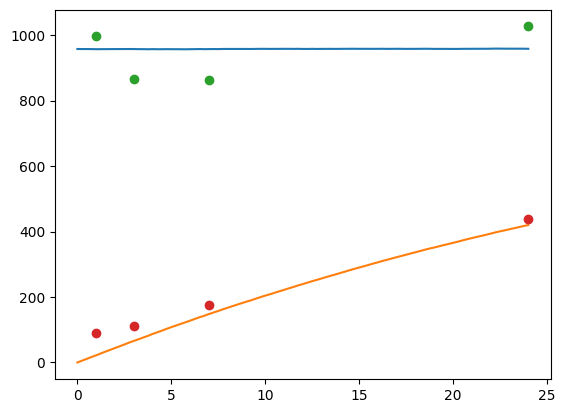

In [15]:
plt.plot(trajectory_time, np.mean(nucleoid_trajectory, axis=0))
plt.plot(trajectory_time, np.mean(edu_trajectory, axis=0))
plt.plot(times, data_nucleoid_mean, "o")
plt.plot(times, data_edu_mean, "o")

In [ ]:
(nucleoid_num_0dy, tagged_num_0dy, mtvolume_0dy, nucleoid_num_1dy, tagged_num_1dy, mtvolume_1dy,
           nucleoid_num_2dy, tagged_num_2dy, mtvolume_2dy, nucleoid_num_4dy, tagged_num_4dy, mtvolume_4dy,
           initial_average_peak1_proportion_chase, final_average_peak1_proportion_chase, 
           variance_statistic, trajectory_chase) = logarithmic_three_population_chase(np.array([4.39476635e+02, 1.00543377e+00, 1.76155608e-01, 3.50376057e-01,
       2.13523406e-02, 3.01376679e-02, 2.63151630e-01, 0.00000000e+00,
       3.50376057e-01, 2.13523406e-02, 0.00000000e+00, 7.82829140e-03]), verbose = True, full_trajectory=True)

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

In [3]:
(nucleoid_num_0dy, tagged_num_0dy, mtvolume_0dy, nucleoid_num_1dy, tagged_num_1dy, mtvolume_1dy,
           nucleoid_num_2dy, tagged_num_2dy, mtvolume_2dy, nucleoid_num_4dy, tagged_num_4dy, mtvolume_4dy,
           initial_average_peak1_proportion_chase, final_average_peak1_proportion_chase, 
           variance_statistic, trajectory_chase) = ssm.logarithmic_two_population_chase(np.array([4.39476635e+02, 1.00543377e+00, 1.76155608e-01, 1.72391662e-01, 1.78061207e-02, 2.14532193e-01, 2.03005361e-03,
       8.15161058e-01, 7.06340504e-03, 7.17818572e-04]), verbose = True, full_trajectory=True)

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

In [23]:
(nucleoid_num_0dy, tagged_num_0dy, mtvolume_0dy, nucleoid_num_1dy, tagged_num_1dy, mtvolume_1dy,
           nucleoid_num_2dy, tagged_num_2dy, mtvolume_2dy, nucleoid_num_4dy, tagged_num_4dy, mtvolume_4dy,
           initial_average_peak1_proportion_chase, final_average_peak1_proportion_chase, 
           variance_statistic, trajectory_chase) = logarithmic_one_population_chase(np.array([4.39476635e+02, 1.00543377e+00, 1.76155608e-01, 0.016, 0.009, 0.012, 0.001]), verbose = True, full_trajectory=True)

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

In [ ]:
#three pop
trajectory_time = np.arange(0,4*24+0.25,0.25)
times_chase = np.array([0,1,2,4])*24
nucleoid_trajectory_chase = np.sum(trajectory_chase, axis = 2)
edu_trajectory_chase = nucleoid_trajectory_chase - trajectory_chase[:,:,0] - trajectory_chase[:,:,3] - trajectory_chase[:,:,9]

In [4]:
#two pop
trajectory_time = np.arange(0,4*24+0.25,0.25)
times_chase = np.array([0,1,2,4])*24
nucleoid_trajectory_chase = np.sum(trajectory_chase, axis = 2)
edu_trajectory_chase = nucleoid_trajectory_chase - trajectory_chase[:,:,0] - trajectory_chase[:,:,3]

In [25]:
#one pop
trajectory_time = np.arange(0,4*24+0.25,0.25)
times_chase = np.array([0,1,2,4])*24
nucleoid_trajectory_chase = np.sum(trajectory_chase, axis = 2)
edu_trajectory_chase = nucleoid_trajectory_chase - trajectory_chase[:,:,0]

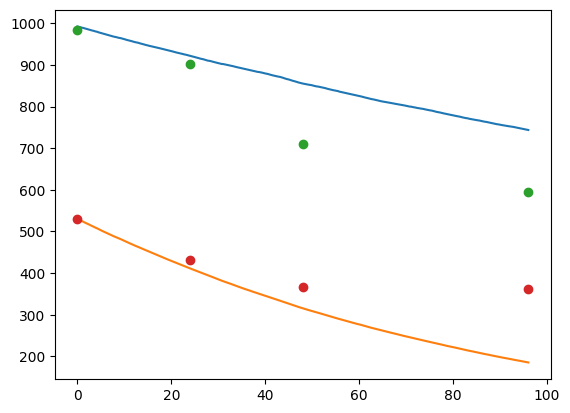

In [26]:

plt.plot(trajectory_time, np.mean(nucleoid_trajectory_chase, axis=0))
plt.plot(trajectory_time, np.mean(edu_trajectory_chase, axis=0))
plt.plot(times_chase, data_nucleoid_mean_chase, "o")
plt.plot(times_chase, data_edu_mean_chase, "o")

In [8]:
x = np.load("./data_preprocessing/simulated_data/three_population_model/three_population_chase_params.npy")

The optimised version consistently runs much faster. The ABC, however, runs much slower. WHY?????

In [26]:
y=x[5]

In [27]:
#beta0, beta1, sig, diffusion_prob_pulse, mu_d_pulse, mu_b_pulse, true_birth_param, mu_b_chase, diffusion_prob_chase, mu_d_chase, mu_a_chase, c
(nucleoid_num_0dy, tagged_num_0dy, mtvolume_0dy, nucleoid_num_1dy, tagged_num_1dy, mtvolume_1dy,
           nucleoid_num_2dy, tagged_num_2dy, mtvolume_2dy, nucleoid_num_4dy, tagged_num_4dy, mtvolume_4dy,
           initial_average_peak1_proportion_chase, final_average_peak1_proportion_chase, 
           variance_statistic, trajectory_chase) = logarithmic_three_population_chase(y, verbose = True, full_trajectory=False)

------------------------Beginning Burn In --------------------------
Iteration 0 Finished
Iteration 1 Finished
Iteration 2 Finished
Iteration 3 Finished
Iteration 4 Finished
Iteration 5 Finished
Iteration 6 Finished
Iteration 7 Finished
Iteration 8 Finished
Iteration 9 Finished
Iteration 10 Finished
Iteration 11 Finished
Iteration 12 Finished
Iteration 13 Finished
Iteration 14 Finished
Iteration 15 Finished
Iteration 16 Finished
Iteration 17 Finished
Iteration 18 Finished
Iteration 19 Finished
Iteration 20 Finished
Iteration 21 Finished
Iteration 22 Finished
Iteration 23 Finished
Iteration 24 Finished
Iteration 25 Finished
Iteration 26 Finished
Iteration 27 Finished
Iteration 28 Finished
Iteration 29 Finished
Iteration 30 Finished
Iteration 31 Finished
Iteration 32 Finished
Iteration 33 Finished
Iteration 34 Finished
Iteration 35 Finished
Iteration 36 Finished
Iteration 37 Finished
Iteration 38 Finished
Iteration 39 Finished
Iteration 40 Finished
Iteration 41 Finished
Iteration 42 Fini

In [28]:
(nucleoid_num_1hr, tagged_num_1hr, mtvolume_1hr, nucleoid_num_3hr, tagged_num_3hr, mtvolume_3hr, 
           nucleoid_num_7hr, tagged_num_7hr, mtvolume_7hr, nucleoid_num_24hr, tagged_num_24hr, mtvolume_24hr, 
           nucleoid_num_0dy, tagged_num_0dy, mtvolume_0dy, nucleoid_num_1dy, tagged_num_1dy, mtvolume_1dy,
           nucleoid_num_2dy, tagged_num_2dy, mtvolume_2dy, nucleoid_num_4dy, tagged_num_4dy, mtvolume_4dy,
           average_peak1_proportion, average_peak1_proportion_chase,
           variance_statistic) = logarithmic_three_population2(y)

In [32]:
len(tagged_num_0dy)

39

In [22]:
print(initial_average_peak1_proportion_chase)
print(final_average_peak1_proportion_chase)

0.49872378357262587
0.49872378357262587


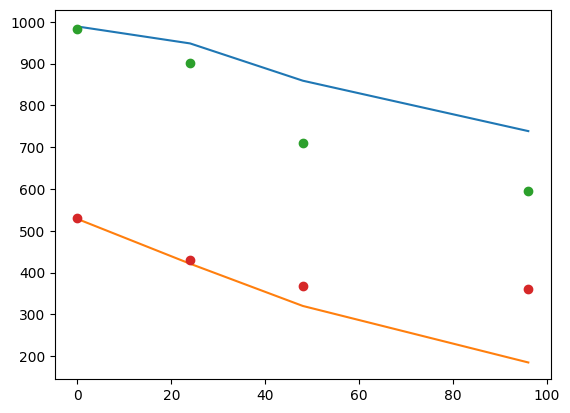

In [22]:
simulated_nucleoid_mean_chase = np.array([np.mean(nucleoid_num_0dy),np.mean(nucleoid_num_1dy),np.mean(nucleoid_num_2dy),np.mean(nucleoid_num_4dy)])
simulated_edu_mean_chase = np.array([np.mean(tagged_num_0dy),np.mean(tagged_num_1dy),np.mean(tagged_num_2dy),np.mean(tagged_num_4dy)])
times_chase = np.array([0,1,2,4])*24
plt.plot(times_chase, simulated_nucleoid_mean_chase)
plt.plot(times_chase, simulated_edu_mean_chase)
plt.plot(times_chase, data_nucleoid_mean_chase, "o")
plt.plot(times_chase, data_edu_mean_chase, "o")